In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("hiring.csv")
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [3]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
!pip install word2number


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5680 sha256=27afbbc2846ab6f7f6c651a562e57f9657809c1e1365f374588c086af5e93d34
  Stored in directory: c:\users\tmuniyandi\appdata\local\pip\cache\wheels\cd\ef\ae\073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [6]:
from word2number import w2n
import numpy as np

def convert_exp(x):
    try:
        return w2n.word_to_num(str(x))
    except:
        return np.nan

df['experience'] = df['experience'].apply(convert_exp)


In [7]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [8]:
df['experience'] = df['experience'].fillna(0)


In [9]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [18]:
df.rename(columns={'test_score(out of 10)': 'test_score'}, inplace=True)
df.rename(columns={'interview_score(out of 10)': 'interview_score'}, inplace=True)
df.rename(columns={'salary($)':'salary'},inplace=True)
df.to_csv('changed.csv', index=False)

In [19]:
df

,experience,test_score,interview_score,salary
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [20]:
df['test_score'] = df['test_score'].fillna(df['test_score'].median())

In [38]:
df.test_score.median()

np.float64(8.0)

In [21]:
df

,experience,test_score,interview_score,salary
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [22]:
reg = linear_model.LinearRegression()
x = df[['experience','test_score','interview_score']]
y = df.salary


In [26]:
reg.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [28]:
reg.predict([[2,9,6]])

C:\PythonTutorial\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [29]:
reg.predict([[12,10,10]])

C:\PythonTutorial\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [31]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [32]:
reg.intercept_

np.float64(17737.263464337688)

In [33]:
2812.95487627*12+1845.70596798*10+2205.24017467*10+17737.263464337688

92002.18340607767

In [34]:
reg.predict([[12,10,10]])

C:\PythonTutorial\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

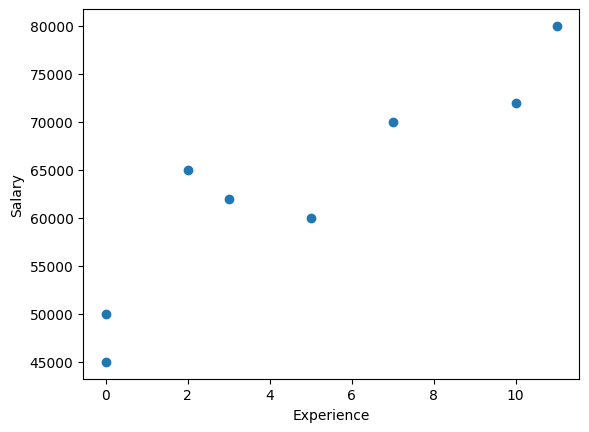

In [35]:
plt.scatter(df['experience'], df['salary'])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()


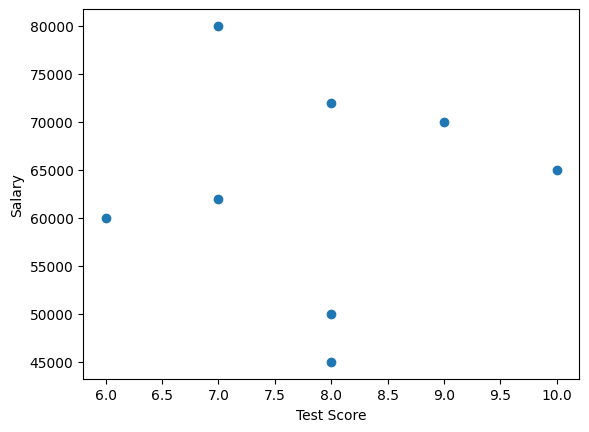

In [36]:
plt.scatter(df['test_score'], df['salary'])
plt.xlabel("Test Score")
plt.ylabel("Salary")
plt.show()


In [39]:
import joblib

In [40]:
joblib.dump(reg,'salary_model.pkl')

['salary_model.pkl']

In [41]:
model = joblib.load('salary_model.pkl')

In [43]:
model.predict([[12,10,10]])

C:\PythonTutorial\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])